<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تحلیل زمانی
</font>
</h1>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

housing_extended = pd.read_csv('../3_add_new_features/housing_extended.csv', encoding='gbk')
housing_extended.head()
#housing_extended.info()

Lng        Lat   tradeTime     DOM  totalPrice  square  livingRoom  \
0  116.475489  40.019520  2016-08-09  1464.0       415.0  131.00           2   
1  116.453917  39.881534  2016-07-28   903.0       575.0  132.38           2   
2  116.438010  40.076114  2016-09-30   965.0       297.5  134.00           3   
3  116.428392  39.886229  2016-08-28   927.0       392.0   81.00           2   
4  116.466280  39.991363  2016-07-22   861.0       275.6   53.00           1   

   drawingRoom  kitchen  bathRoom  floor  constructionTime  \
0            1        1         1     26              2005   
1            2        1         2     22              2004   
2            1        1         1     21              2008   
3            1        1         1      6              1960   
4            0        1         1      8              2005   

  renovationCondition         buildingStructure  ladderRatio      elevator  \
0          Simplicity  steel-concrete composite        0.217  has elevator   
1           hardcover  steel-concrete composite        0.667  has elevator   
2               other  steel-concrete composite        0.273  has elevator   
3               rough                     mixed        0.333   no elevator   
4          Simplicity  steel-concrete composite        0.333  has elevator   

       subway  district  distanceToCapital  pricePerSquare  
0  has subway         7          14.074996     3167.938931  
1   no subway         7           4.701224     4343.556428  
2   no subway         6          19.293041     2220.149254  
3  has subway         1           2.683335     4839.506173  
4   no subway         7          10.914652     5200.000000

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم گزارشی تهیه کنیم و مناطق مختلف شهر را از زوایای گوناگون مورد بررسی قرار دهیم. 
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت اول
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتافریمی به نام <code>districts_df</code> بسازید و <code>index</code> آنرا برابر ستون <code>district</code> قرار دهید. برای هر منطقه موارد زیر را حساب کنید:
<ul dir=rtl>

  <li>
pricePerSquare mean
<br>
متوسط قیمت هر متر مربع
</li>
<br>

  <li>
% houses with elevator
<br>
درصد خانه‌هایی که آسانسور دارند
</li>
<br>

  <li>
% houses with subway
<br>
درصد خانه‌هایی که به مترو دسترسی دارند
</li>
<br>

  <li>
square mean
<br>
متوسط متراژ خانه‌ها
</li>
<br>
  <li>
building age mean
<br>
متوسط عمر خانه‌ها (به سال)
<br>
(عمر هر خانه تا سال ۲۰۲۱ محاسبه می‌شود.)
</li>
<br>

  <li>
frequent buildingStructure
<br>
رایج‌ترین نوع ساختمان
</li>
<br>
</ul>
</font>
</p>

In [2]:
def average_age(arr):
    age = 2021 - arr.mean()
    return age


def has_elevator(arr):
    all = arr.count()
    has_elevator = arr.value_counts()['has elevator']
    return (has_elevator / all) * 100

def has_subway(arr):
    all = arr.count()
    has_subway = arr.value_counts()['has subway']
    return (has_subway / all) * 100

def mode(arr):
    return arr.mode()
    
districts_df = housing_extended.groupby('district')

districts_df = districts_df.agg({'pricePerSquare': 'mean', 'elevator': has_elevator, 'subway': has_subway, 'square': 'mean', 'constructionTime': average_age, 'buildingStructure': mode})

districts_df = districts_df.rename(columns={'pricePerSquare': 'pricePerSquare mean', 'elevator': '% houses with elevator', 'subway': '% houses with subway', 'square': 'square mean', 'constructionTime': 'buildeng age mean', 'buildingStructure': 'frequent buildingStructure'})

districts_df.reset_index(inplace=True)
districts_df

district  pricePerSquare mean  % houses with elevator  \
0          1          5981.774965               56.216550   
1          2          3805.924811               68.647623   
2          3          3130.333142               66.636691   
3          4          2999.928821               39.983398   
4          5          2841.761483               80.077031   
5          6          2952.222451               37.892663   
6          7          4225.965657               66.746216   
7          8          5312.914827               51.883462   
8          9          3491.126972               46.534461   
9         10          6464.899480               48.030692   
10        11          2782.509680               51.762953   
11        12          2615.607527               39.641311   
12        13          2412.935147               33.773796   

    % houses with subway  square mean  buildeng age mean  \
0              93.488404    67.047856          25.151709   
1              61.825544    76.951352          20.639123   
2              47.032374    92.071484          15.494604   
3              43.027117    86.322272          18.324364   
4              39.005602    89.297990          11.271359   
5              43.553669   100.121614          17.536464   
6              68.307898    78.845544          22.553717   
7              61.087404    73.615248          24.191570   
8              27.636823    73.047513          25.653835   
9              76.322951    62.386157          28.349599   
10             34.125145    86.153699          16.959361   
11              0.123686    85.082703          18.532468   
12             29.764838    92.813069          19.864502   

   frequent buildingStructure  
0    steel-concrete composite  
1    steel-concrete composite  
2    steel-concrete composite  
3                       mixed  
4    steel-concrete composite  
5                       mixed  
6    steel-concrete composite  
7    steel-concrete composite  
8    steel-concrete composite  
9                       mixed  
10   steel-concrete composite  
11                      mixed  
12                      mixed

In [3]:

districts_df.set_index('district', inplace=True)
districts_df

pricePerSquare mean  % houses with elevator  % houses with subway  \
district                                                                      
1                 5981.774965               56.216550             93.488404   
2                 3805.924811               68.647623             61.825544   
3                 3130.333142               66.636691             47.032374   
4                 2999.928821               39.983398             43.027117   
5                 2841.761483               80.077031             39.005602   
6                 2952.222451               37.892663             43.553669   
7                 4225.965657               66.746216             68.307898   
8                 5312.914827               51.883462             61.087404   
9                 3491.126972               46.534461             27.636823   
10                6464.899480               48.030692             76.322951   
11                2782.509680               51.762953             34.125145   
12                2615.607527               39.641311              0.123686   
13                2412.935147               33.773796             29.764838   

          square mean  buildeng age mean frequent buildingStructure  
district                                                             
1           67.047856          25.151709   steel-concrete composite  
2           76.951352          20.639123   steel-concrete composite  
3           92.071484          15.494604   steel-concrete composite  
4           86.322272          18.324364                      mixed  
5           89.297990          11.271359   steel-concrete composite  
6          100.121614          17.536464                      mixed  
7           78.845544          22.553717   steel-concrete composite  
8           73.615248          24.191570   steel-concrete composite  
9           73.047513          25.653835   steel-concrete composite  
10          62.386157          28.349599                      mixed  
11          86.153699          16.959361   steel-concrete composite  
12          85.082703          18.532468                      mixed  
13          92.813069          19.864502                      mixed

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
خط اول خروجی شما باید به شکل زیر باشد. (سطرها را بر اساس شماره منطقه مرتب کنید.)
</font>
</p>


|   district |   pricePerSquare mean |   % houses with elevator |   % houses with subway |   square mean |   buildeng age mean | frequent buildingStructure   |
|-----------:|----------------------:|-------------------------:|-----------------------:|--------------:|--------------------:|:-----------------------------|
|          1 |               5981.77 |                  56.216550 |                93.4884 |       67.0479 |             25.1517 | steel-concrete composite     |


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیل داده‌ها بر اساس ترتیب زمانی آنها در برخی حوزه‌ها کاربرد بسیاری دارد. برای مثال، پیش‌بینی قیمت در بورس، پیش‌بینی قیمت طلا، بررسی حجم فروش اجناس در بازه‌های زمانی مختلف و غیره. زمان انجام معاملات هر خانه در این دیتافریم مشخص شده است و ما می‌توانیم چنین تحلیل‌هایی را بر روی آن انجام دهیم.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اولین کاری که باید انجام دهیم، تبدیل ستون tradeTime به فرمت زمانی می‌باشد. برای این‌کار از تابع <code>to_datetime</code> استفاده می‌کنیم.
</font>
</p>

In [4]:
housing_extended['tradeTime'] = pd.to_datetime(housing_extended['tradeTime'])
housing_extended.head()

Lng        Lat  tradeTime     DOM  totalPrice  square  livingRoom  \
0  116.475489  40.019520 2016-08-09  1464.0       415.0  131.00           2   
1  116.453917  39.881534 2016-07-28   903.0       575.0  132.38           2   
2  116.438010  40.076114 2016-09-30   965.0       297.5  134.00           3   
3  116.428392  39.886229 2016-08-28   927.0       392.0   81.00           2   
4  116.466280  39.991363 2016-07-22   861.0       275.6   53.00           1   

   drawingRoom  kitchen  bathRoom  floor  constructionTime  \
0            1        1         1     26              2005   
1            2        1         2     22              2004   
2            1        1         1     21              2008   
3            1        1         1      6              1960   
4            0        1         1      8              2005   

  renovationCondition         buildingStructure  ladderRatio      elevator  \
0          Simplicity  steel-concrete composite        0.217  has elevator   
1           hardcover  steel-concrete composite        0.667  has elevator   
2               other  steel-concrete composite        0.273  has elevator   
3               rough                     mixed        0.333   no elevator   
4          Simplicity  steel-concrete composite        0.333  has elevator   

       subway  district  distanceToCapital  pricePerSquare  
0  has subway         7          14.074996     3167.938931  
1   no subway         7           4.701224     4343.556428  
2   no subway         6          19.293041     2220.149254  
3  has subway         1           2.683335     4839.506173  
4   no subway         7          10.914652     5200.000000

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت دوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
طبق نظر افراد محلی، چند ماه است که قیمت خانه در حال کاهش است و پیش‌بینی می‌شود این روند ادامه یابد. در این تمرین می‌خواهیم صحت این نظریه را بررسی کنیم.
<ul dir=rtl>
  <li>متد <code>resample</code> متدی قدرتمند برای کار با سری‌های زمانی است. با این متد می‌توان سطرها را بر اساس بازه زمانی گروه‌بندی کرد. پارامتر <code>rule</code> بازه مورد نظر و پارامتر <code>on</code> ستونی که زمان در آن ذخیره شده را مشخص می‌کند.</li>
  <li>یک عکس شامل یک صفحه محور بسازید و اندازه طول و عرض آن را برابر ۸ اینچ قرار دهید.</li>
  <li>با استفاده از متد <code>resample</code> میانگین قیمت هر متر مربع در معاملات ماهانه را حساب کنید. قبل از سال ۲۰۱۰ زیر ده معامله انجام شده است. معاملات بعد از سال ۲۰۱۰ را وارد محاسبات خود کنید.
</li>
  <li>
با استفاده از رابط پانداس، اطلاعات به دست آمده را روی صفحه محوری که پیش از این ساختید رسم کنید. رنگ خط را برابر <code>crimson</code> قرار دهید.
</li>

<li>
تنظیمات را طوری تغییر دهید که نمودار خروجی شما دقیقا مانند شکل زیر شود.
</li>

</ul>
</font>
</p>


<p style="text-align:center;"><img src="fig1.png"></p>



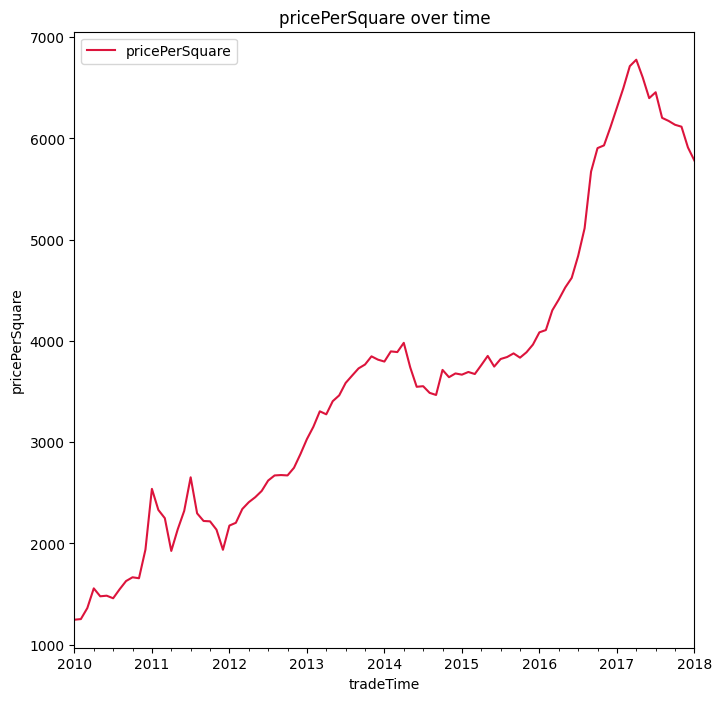

In [5]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(8, 8)

data = housing_extended[['tradeTime', 'pricePerSquare']]

data = data.resample('M', on='tradeTime').mean()

data = data.reset_index()

data = data[ data.tradeTime > '2010']

data.plot(ax=ax1, x='tradeTime', y='pricePerSquare', color='crimson')

ax1.set_title('pricePerSquare over time')
ax1.set_ylabel('pricePerSquare');

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
شایعه دیگری که می‌خواهیم بررسی کنیم، کاهش <b> تعداد </b> معاملات خانه‌های نزدیک مرکز شهر است. این نمودار مانند نمودار قبلی است و این تغییرات را باید در آن ایجاد کنید.
<ul dir=rtl>

  <li>
بازه زمانی به جای ماه، ۳ ماه می‌باشد و علاوه بر اینکه فقط معاملات بعد از ۲۰۱۰ باید بررسی شوند، معاملات خانه‌هایی که فاصله آن‌ها از مرکز بیشتر یا مساوی ۱۵ کیلومتر است هم باید حذف شوند.
</li>
  <li>
رنگ خط را برابر <code>orange</code> قرار دهید.
</li>

<li>
تنظیمات را طوری تغییر دهید که نمودار خروجی شما دقیقا مانند شکل زیر شود.
</li>

<li>
نکته: ابتدا معاملات بعد از ۲۰۱۰ را انتخاب کنید، سپس از resample استفاده کنید و در نهایت تعداد خانه‌هایی که فاصله آنها کمتر از ۱۵ کیلومتر است را بشمارید.</li>

</ul>
</font>
</p>

<p style="text-align:center;"><img src="fig2.png"></p>



AttributeError: 'bool' object has no attribute 'sum'

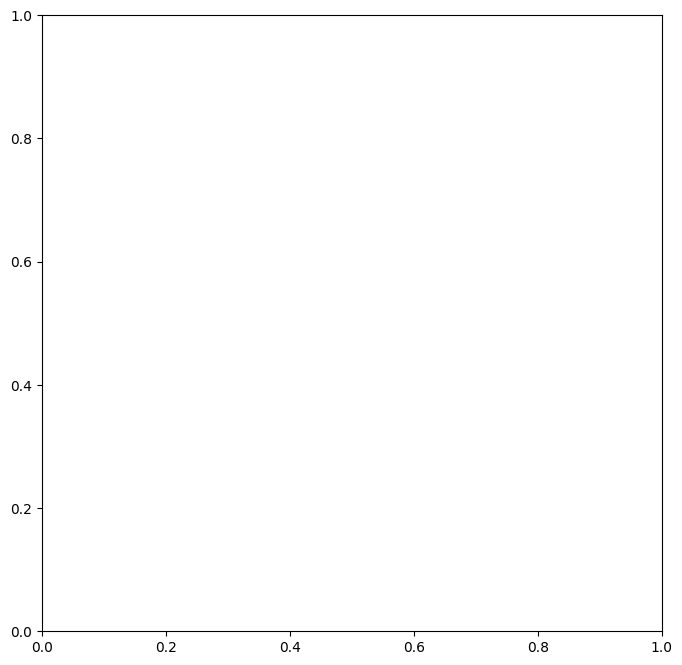

In [21]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(8, 8)

center = housing_extended[['tradeTime', 'pricePerSquare', 'distanceToCapital']]

center = center[ center.tradeTime > '2010']

center = center.resample('3M', on='tradeTime').mean()

center = center.reset_index()

center = center.distanceToCapital.apply(lambda x: (x < 15).sum())

center.plot(ax=ax2, x='tradeTime', y='distanceToCapital', color='orange')

ax2.set_title('center city house trades over time')
ax2.set_ylabel('frequency')



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


In [22]:




import zipfile
import joblib

joblib.dump(districts_df,"districts_df")
joblib.dump(fig1,"fig1")
joblib.dump(fig2,"fig2")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["districts_df","fig1","fig2", '5_time_series.ipynb']
compress(file_names)

File Paths:
['districts_df', 'fig1', 'fig2', '5_time_series.ipynb']
